In [1]:
import os, sys
my_path = os.getcwd()+"/.."
print(my_path)
sys.path.append(my_path)

from IPython.display import HTML

import tempfile
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline


#Ensembler
##COde
from ensembler.potentials.OneD import harmonicOscillator
from ensembler.integrator.stochastic import monteCarloIntegrator, metropolisMonteCarloIntegrator, langevinIntegrator
from ensembler.integrator.newtonian import positionVerletIntegrator #, leapFrogIntegrator
from ensembler.system.basic_system import system   #change

##Visualisation
from ensembler.visualisation.plotSimulations import static_sim_plots
from ensembler.visualisation.animationSimulation import animation_trajectory, animation_EDS_trajectory


/Users/stlinker/Desktop/phD/Riniker/Github/Ensembler/examples/..


# Executing Simulations

## Stochastic Integrators

### Metropolis 

In [2]:
#super easy Metropolis_MonteCarlo simulation
#settings
space_range = [-10, 10]
sim_steps=100

##Simulation Setup
pot=harmonicOscillator(k=2)
integrator = monteCarloIntegrator() 
sys=system(potential=pot, integrator=integrator,  position=0)

#simulate
cur_state = sys.simulate(sim_steps, withdrawTraj=True) #500000, withdrawTraj=True)
print()
print("last_state: ", cur_state)
print(len(sys.trajectory))

sys.trajectory.head()



last_state:  State(position=0.15775952257382986, temperature=nan, totEnergy=0.024888066962722732, totPotEnergy=0.024888066962722732, totKinEnergy=nan, dhdpos=0.1585317501986221, velocity=nan)
101


position  temperature  totEnergy  totPotEnergy  totKinEnergy    dhdpos  \
0       NaN          NaN        NaN           NaN           NaN       NaN   
1 -0.549695          NaN   0.302164      0.302164           NaN -0.549695   
2  0.385158          NaN   0.148347      0.148347           NaN  0.934853   
3  0.597075          NaN   0.356499      0.356499           NaN  0.211917   
4  1.476572          NaN   2.180265      2.180265           NaN  0.879497   

   velocity  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

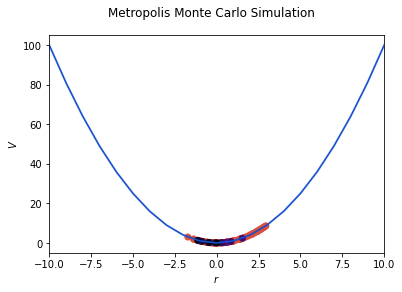

In [3]:

#plot simulation
ani, out_path = animation_trajectory(sys, x_range=space_range, title="Metropolis Monte Carlo Simulation")

##put it into jupyter:

os.chdir(tempfile.gettempdir())
HTML(ani.to_jshtml())

/Users/stlinker/anaconda/envs/python3/lib/python3.6/site-packages/numpy/linalg/linalg.py:2116: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/stlinker/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1239: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/Users/stlinker/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/Users/stlinker/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1254: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/Users/stlinker/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1255: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


(None, <Figure size 1152x288 with 3 Axes>)

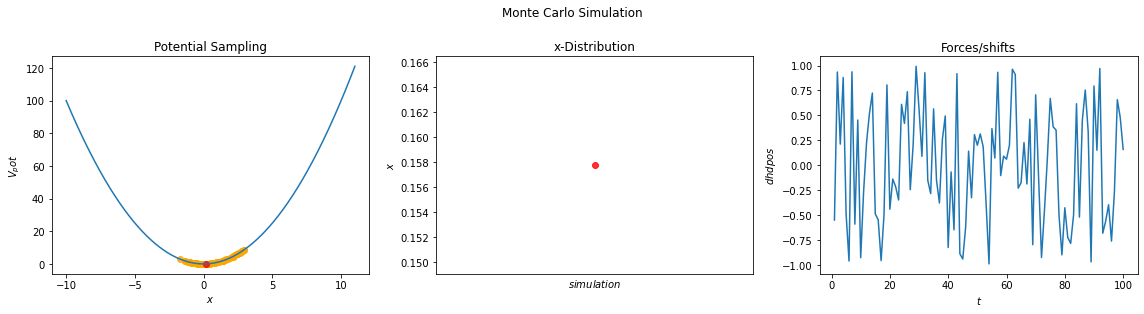

In [4]:
#static plot
static_sim_plots(sys, title="Monte Carlo Simulation", x_range=list(range(-10,11)))

### Metropolis Monte Carlo

In [5]:
#super easy Metropolis_MonteCarlo simulation
#settings
space_range = [-10, 10]
sim_steps=100
pot=harmonicOscillator(k=2)
integrator = metropolisMonteCarloIntegrator(randomnessIncreaseFactor=5) 
sys=system(potential=pot, integrator=integrator,  position=9)

#simulate
cur_state = sys.simulate(sim_steps, withdrawTraj=True) #500000, withdrawTraj=True)
print()
print("last_state: ", cur_state)
print(len(sys.trajectory))
sys.trajectory.head()



last_state:  State(position=-0.5824401120198319, temperature=nan, totEnergy=0.3392364840896744, totPotEnergy=0.3392364840896744, totKinEnergy=nan, dhdpos=0.29222802168926454, velocity=None)
101


position  temperature  totEnergy  totPotEnergy  totKinEnergy    dhdpos  \
0       NaN          NaN        NaN           NaN           NaN       NaN   
1  8.239605          NaN  67.891089     67.891089           NaN -0.760395   
2  7.842160          NaN  61.499472     61.499472           NaN -0.397445   
3  6.998442          NaN  48.978191     48.978191           NaN -0.843718   
4  6.813984          NaN  46.430380     46.430380           NaN -0.184458   

   velocity  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

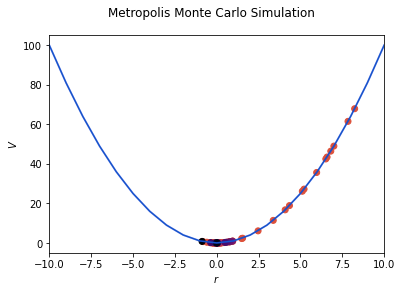

In [6]:
#plot
ani, out_path = animation_trajectory(sys, x_range=space_range, title="Metropolis Monte Carlo Simulation")

##put it into jupyter:
os.chdir(tempfile.gettempdir())
HTML(ani.to_jshtml())


/Users/stlinker/anaconda/envs/python3/lib/python3.6/site-packages/numpy/linalg/linalg.py:2116: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/stlinker/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1239: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/Users/stlinker/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/Users/stlinker/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1254: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/Users/stlinker/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1255: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


(None, <Figure size 1152x288 with 3 Axes>)

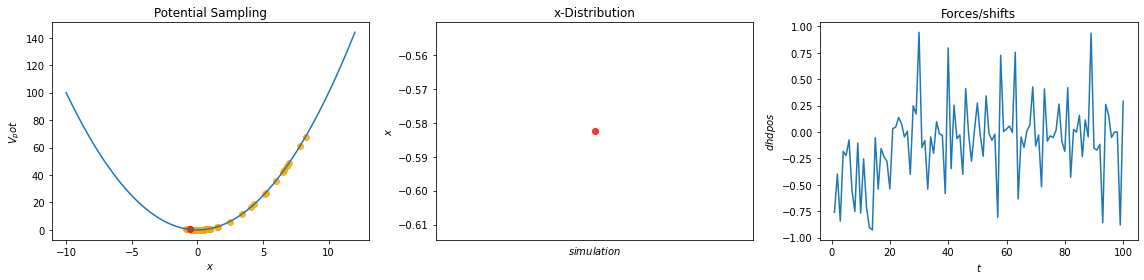

In [7]:
#plot
static_sim_plots(sys, x_range=[-10,11])

### Langevin

In [1]:
import os, sys
my_path = os.getcwd()+"/.."
print(my_path)
sys.path.append(my_path)

from IPython.display import HTML

import tempfile
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline


#Ensembler
##COde
from ensembler.potentials.OneD import harmonicOscillator
from ensembler.integrator.stochastic import monteCarloIntegrator, metropolisMonteCarloIntegrator, langevinIntegrator
from ensembler.integrator.newtonian import positionVerletIntegrator #, leapFrogIntegrator
from ensembler.system.basic_system import system   #change

##Visualisation
from ensembler.visualisation.plotSimulations import static_sim_plots
from ensembler.visualisation.animationSimulation import animation_trajectory, animation_EDS_trajectory

/Users/stlinker/Desktop/phD/Riniker/Github/Ensembler/examples/..


In [2]:
#Simple Langevin integration simulation:
#Thermostat is already included (Langevin thermostat)
#settings
sim_steps = 500
x_min, x_max = (-10, 10)
#max_step_size = 2.0

#Simulation Setup
pot=harmonicOscillator()
integrator = langevinIntegrator(dt=0.1, gamma=15, oldPosition=-2.4)
sys=system(potential=pot, integrator=integrator, position=-2.5, temperature=300)

#simulate
cur_state = sys.simulate(sim_steps, withdrawTraj=True, initSystem=False)

print("Trajectory length: ",len(sys.trajectory))
print()
print("last_state: ", cur_state)
print(len(sys.trajectory))
sys.trajectory.head()

Trajectory length:  501

last_state:  State(position=22.055399302263055, temperature=nan, totEnergy=243.22031919113283, totPotEnergy=243.22031919113283, totKinEnergy=nan, dhdpos=-22.11032580798997, velocity=None)
501


position  temperature  totEnergy  totPotEnergy  totKinEnergy    dhdpos  \
0 -2.500000          NaN   6.216099      3.125000      3.091099       NaN   
1 -2.358478          NaN   2.781210      2.781210           NaN  2.500000   
2 -1.579753          NaN   1.247810      1.247810           NaN  2.358478   
3 -0.757942          NaN   0.287238      0.287238           NaN  1.579753   
4  1.945531          NaN   1.892545      1.892545           NaN  0.757942   

   velocity  
0 -2.486403  
1       NaN  
2       NaN  
3       NaN  
4       NaN

(None, <Figure size 1152x288 with 3 Axes>)

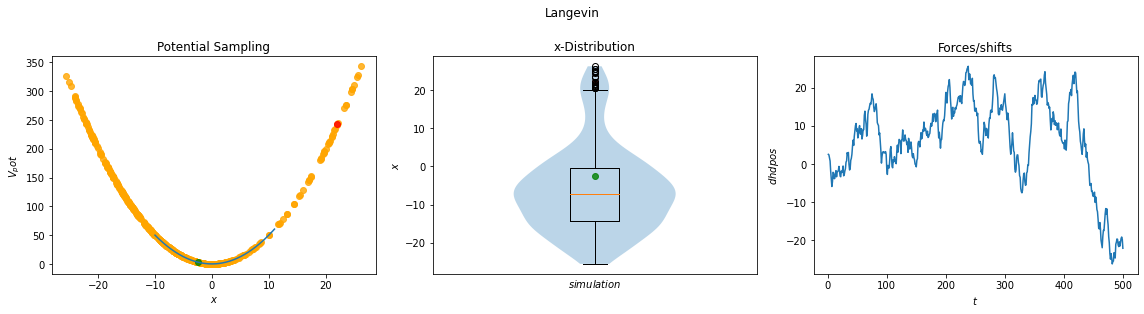

In [3]:
#plot
static_sim_plots(sys, title="Langevin", x_range=list(range(-10,11)))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


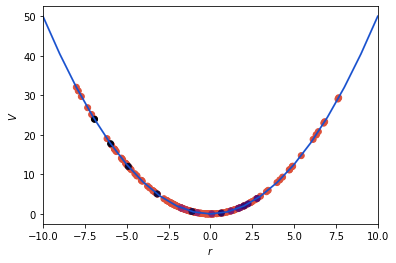

In [14]:
#animation
ani, out_path = animation_trajectory(sys, [x_min, x_max])

os.chdir(tempfile.gettempdir())
HTML(ani.to_jshtml())



## Newtonian Integrators

### Position Verlet

In [6]:
#Simple Verlet integration simulation:
#UNDER DEVELOPMENT!The temperature is not constant!!! -- BUGGY!
#settings
sim_steps = 200
x_min, x_max = (-10, 10)
max_step_size = 2.0

#Simulation Setup
pot=harmonicOscillator()
integrator = positionVerletIntegrator(dt=0.1)
sys=system(potential=pot, integrator=integrator, position=-7.5)

#simulate
cur_state = sys.simulate(sim_steps, withdrawTraj=True, initSystem=False)

print("Trajectory length: ",len(sys.trajectory))


Simulation:   0%|          | 0/200 [00:00<?, ?it/s]

-7.5
-6.572300615741861
-4.987371169909536
-2.903704607086257
-0.5296675835543527
1.897336198332987
4.1346063603870284
5.958415886402367
7.186383823777469
7.6957133787748235
7.435471595894696
6.431682653425098
4.784725445612991
2.6592956932395846
0.26793637154221983
-2.1502165873093673
-4.353347887430018
-6.121144398807666
-7.276826470304548
-7.704825894770975
-7.362342729760305
-6.283625291773603
-4.576545324609542
-2.4118108249845265
-0.0058952428610581364
2.400609863548516
4.567053983603238
6.2767927052976376
7.358852156462272
7.70502639198068
7.28069798830102
6.128299785791257
4.363071604702369
2.1615362631432435
-0.2561527047302059
-2.6482264021306348
-4.775477459318
-6.425180770573565
-7.432366004771774
-7.696314638492805
-7.190631808364556
-5.965885797399851
-4.144551206695161
-1.908761495320955
0.517904365585347
2.892779789933114
4.978377235287569
6.566136957113268
7.49728298322764
7.678700711019248
7.092248367708931
5.7965711876277215
3.9212368887837394
1.6537789010613833
-0.7


-7.629749734528131
-6.9105105479763145
-5.500220306626867
-3.539908034614732
-1.225604959141124
1.2112586122465965
3.526996322409657
5.490034400331752
6.904069038220673
7.627696772287525
7.588554829125625
6.790557403051163
5.313504236671584
3.3051006466248465
0.9661869919156247
-1.4693453619851597
-3.757943179687428
-5.670746679420954
-7.016475511212384
-7.660556791882576
-7.538582393364511
-6.662749755509994
-5.120642142104478
-3.0664703144885133
-0.7056514554236979
1.7257325491834874
3.984543298872324
5.844899718673928
7.120766166608139
7.684555997881537
7.479890229366781
6.527235437915346
4.9218571026723765
2.8242930571621696
0.44429970593574586
-1.9801236158842523
-4.206534576115825
-6.012292078735815
-7.216820373482223
-7.69966663088041
-7.412546225190555
-6.384171196981645
Trajectory length:  201


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


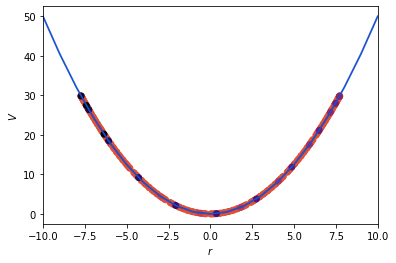

In [9]:
#animation
ani, out_path = animation_trajectory(sys, [x_min, x_max])

os.chdir(tempfile.gettempdir())
HTML(ani.to_jshtml())

(None, <Figure size 1152x288 with 3 Axes>)

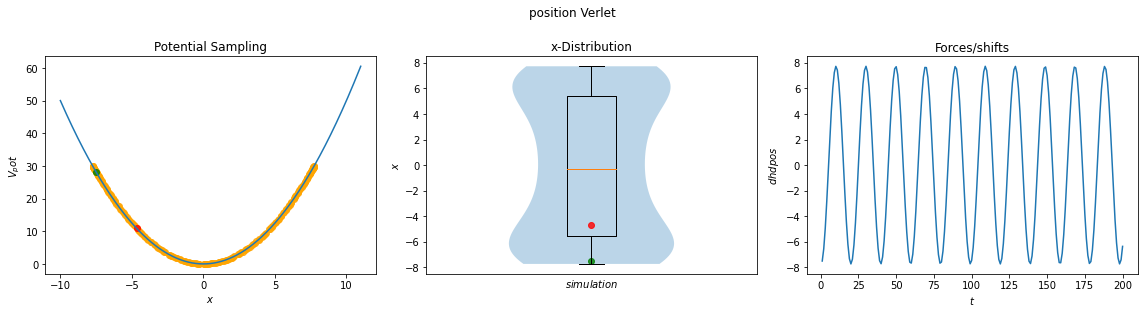

In [10]:

#plot
static_sim_plots(sys, title="position Verlet", x_range=list(range(-10,11)))